In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
import pickle

## SIMPLE Model

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
X=df.drop(['Potability'],axis=1)
y=df.filter(['Potability'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

In [4]:
numeric_pipa=Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ])

preposecor=ColumnTransformer([
        ("numeric",numeric_pipa,['ph','Hardness','Sulfate','Conductivity','Chloramines','Solids','Organic_carbon','Trihalomethanes','Turbidity']),
    ])



In [5]:
# random forest
pipaRF=Pipeline([
        ("prep",preposecor),
        ("rf",RandomForestClassifier())
    ])

parameterRF={
        "rf__n_estimators" : [500],
        "rf__min_samples_leaf":[2],
        "rf__max_depth":range(1,50),
        "rf__criterion":["gini","entropy"],
        "rf__max_features":["auto","sqrt","log2"],
    }

# Decision tree
pipaDT=Pipeline([
        ("prep",preposecor),
        ("dt",DecisionTreeClassifier())
    ])

parameterDT={
        "dt__min_samples_leaf":[2],
        "dt__max_depth":range(1,50),
        "dt__criterion":["gini","entropy"],
    }

# KNN
pipaKNN=Pipeline([
        ("prep",preposecor),
        ("knn",KNeighborsClassifier())
    ])

parameterKNN={
        "knn__n_neighbors" : range(1,50),
        "knn__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "knn__p" : range(1,50),
    }

# SVC
pipaSVC=Pipeline([
        ("prep",preposecor),
        ("svc",SVC())
    ])

parameterSVC={
        "svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        "svc__degree" : range(1,50),
    }


In [6]:
# simple model Random Forest
modelRF = GridSearchCV(pipaRF,parameterRF,cv=5,n_jobs=-1,verbose=1)
modelRF.fit(X_train,y_train.values.ravel())

tuning_terbaikRF=modelRF.best_params_

latihan_akurasiRF=modelRF.score(X_train,y_train)
ujian_akurasiRF=modelRF.score(X_test,y_test)
predRF=modelRF.predict(X_test)
reportRF = classification_report(y_test,predRF)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed: 24.5min finished


In [8]:
filename = 'model/model_RF.sav'
pickle.dump(modelRF, open(filename, 'wb'))

In [9]:
# simple model Decision Tree
modelDT = GridSearchCV(pipaDT,parameterDT,cv=5,n_jobs=-1,verbose=1)
modelDT.fit(X_train,y_train.values.ravel())

tuning_terbaikDT=modelDT.best_params_

latihan_akurasiDT=modelDT.score(X_train,y_train)
ujian_akurasiDT=modelDT.score(X_test,y_test)
predDT=modelDT.predict(X_test)
reportDT = classification_report(y_test,predDT)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 475 out of 490 | elapsed:    6.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    6.1s finished


In [10]:
filename = 'model/model_DT.sav'
pickle.dump(modelDT, open(filename, 'wb'))

In [11]:
# simple model KNN
modelKNN = GridSearchCV(pipaKNN,parameterKNN,cv=5,n_jobs=-1,verbose=1)
modelKNN.fit(X_train,y_train.values.ravel())

tuning_terbaikKNN=modelKNN.best_params_

latihan_akurasiKNN=modelKNN.score(X_train,y_train)
ujian_akurasiKNN=modelKNN.score(X_test,y_test)
predKNN=modelKNN.predict(X_test)
reportKNN = classification_report(y_test,predKNN)


Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8049 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9000 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 10050 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 11200 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12450 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 15250 tasks  

In [12]:
filename = 'model/model_KNN.sav'
pickle.dump(modelKNN, open(filename, 'wb'))

In [13]:
print("")
print("Random Forest")
print('ini adalah tuning terbaik :', tuning_terbaikRF)
print('ini adalah hasil testing',ujian_akurasiRF)
print('ini adalah hasil training', latihan_akurasiRF)
print(reportRF)
print('==============================================')

print("")
print("Decision Tree")
print('ini adalah tuning terbaik :', tuning_terbaikDT)
print('ini adalah hasil testing',ujian_akurasiDT)
print('ini adalah hasil training', latihan_akurasiDT)
print(reportDT)
print('==============================================')

print("")
print("KNN")
print('ini adalah tuning terbaik :', tuning_terbaikKNN)
print('ini adalah hasil testing',ujian_akurasiKNN)
print('ini adalah hasil training', latihan_akurasiKNN)
print(reportKNN)
print('==============================================')


Random Forest
ini adalah tuning terbaik : {'rf__criterion': 'gini', 'rf__max_depth': 48, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__n_estimators': 500}
ini adalah hasil testing 0.7145038167938931
ini adalah hasil training 1.0
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       429
           1       0.63      0.41      0.50       226

    accuracy                           0.71       655
   macro avg       0.69      0.64      0.65       655
weighted avg       0.70      0.71      0.70       655


Decision Tree
ini adalah tuning terbaik : {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 2}
ini adalah hasil testing 0.6778625954198473
ini adalah hasil training 0.6653082017320427
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       429
           1       0.59      0.22      0.32       226

    accuracy                           0.68       655
   mac

In [14]:
outputs = pd.DataFrame ({ "Models": ['RandomForest', 'DecisionTree', 'KNNeighbours'], 'Accuracy' : [ujian_akurasiRF, ujian_akurasiDT, ujian_akurasiKNN] })



In [15]:
outputs.sort_values(by='Accuracy', ascending=False)
outputs.head()

,Models,Accuracy
0,RandomForest,0.714504
1,DecisionTree,0.677863
2,KNNeighbours,0.683969


<AxesSubplot:xlabel='Accuracy', ylabel='Models'>

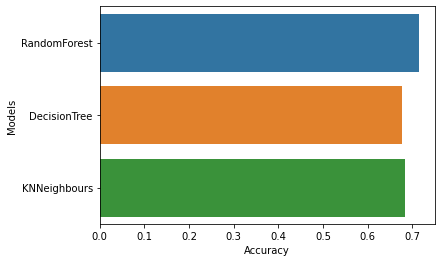

In [16]:
sns.barplot(x= 'Accuracy', y= 'Models', data= outputs)

## 2_Model dengan dropna

In [17]:
df=pd.read_csv("water_potability.csv").dropna()

In [18]:
df.shape

(2009, 10)

In [19]:
X=df.drop(['Potability'],axis=1)
y=df.filter(['Potability'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

In [20]:
numeric_pipa=Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ])

preposecor=ColumnTransformer([
        ("numeric",numeric_pipa,['ph','Hardness','Sulfate','Conductivity','Chloramines','Solids','Organic_carbon','Trihalomethanes','Turbidity']),
    ])



In [21]:
# random forest
pipaRF=Pipeline([
        ("prep",preposecor),
        ("rf",RandomForestClassifier())
    ])

parameterRF={
        "rf__n_estimators" : [500],
        "rf__min_samples_leaf":[2],
        "rf__max_depth":range(1,50),
        "rf__criterion":["gini","entropy"],
        "rf__max_features":["auto","sqrt","log2"],
    }

# Decision tree
pipaDT=Pipeline([
        ("prep",preposecor),
        ("dt",DecisionTreeClassifier())
    ])

parameterDT={
        "dt__min_samples_leaf":[2],
        "dt__max_depth":range(1,50),
        "dt__criterion":["gini","entropy"],
    }

# KNN
pipaKNN=Pipeline([
        ("prep",preposecor),
        ("knn",KNeighborsClassifier())
    ])

parameterKNN={
        "knn__n_neighbors" : range(1,50),
        "knn__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "knn__p" : range(1,50),
    }



In [22]:
# simple model Random Forest
modelRF = GridSearchCV(pipaRF,parameterRF,cv=5,n_jobs=-1,verbose=1)
modelRF.fit(X_train,y_train.values.ravel())

tuning_terbaikRF=modelRF.best_params_

latihan_akurasiRF=modelRF.score(X_train,y_train)
ujian_akurasiRF=modelRF.score(X_test,y_test)
predRF=modelRF.predict(X_test)
reportRF = classification_report(y_test,predRF)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed: 20.0min finished


In [23]:
filename = 'model/model_RF2.sav'
pickle.dump(modelRF, open(filename, 'wb'))

In [24]:
# simple model Decision Tree
modelDT = GridSearchCV(pipaDT,parameterDT,cv=5,n_jobs=-1,verbose=1)
modelDT.fit(X_train,y_train.values.ravel())

tuning_terbaikDT=modelDT.best_params_

latihan_akurasiDT=modelDT.score(X_train,y_train)
ujian_akurasiDT=modelDT.score(X_test,y_test)
predDT=modelDT.predict(X_test)
reportDT = classification_report(y_test,predDT)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    4.5s finished


In [25]:
filename = 'model/model_DT2.sav'
pickle.dump(modelDT, open(filename, 'wb'))

In [26]:
# simple model KNN
modelKNN = GridSearchCV(pipaKNN,parameterKNN,cv=5,n_jobs=-1,verbose=1)
modelKNN.fit(X_train,y_train.values.ravel())

tuning_terbaikKNN=modelKNN.best_params_

latihan_akurasiKNN=modelKNN.score(X_train,y_train)
ujian_akurasiKNN=modelKNN.score(X_test,y_test)
predKNN=modelKNN.predict(X_test)
reportKNN = classification_report(y_test,predKNN)


Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 19552 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 22452 tasks  

In [27]:
filename = 'model/model_KNN2.sav'
pickle.dump(modelKNN, open(filename, 'wb'))

In [28]:
print("")
print("Random Forest")
print('ini adalah tuning terbaik :', tuning_terbaikRF)
print('ini adalah hasil testing',ujian_akurasiRF)
print('ini adalah hasil training', latihan_akurasiRF)
print(reportRF)
print('==============================================')

print("")
print("Decision Tree")
print('ini adalah tuning terbaik :', tuning_terbaikDT)
print('ini adalah hasil testing',ujian_akurasiDT)
print('ini adalah hasil training', latihan_akurasiDT)
print(reportDT)
print('==============================================')

print("")
print("KNN")
print('ini adalah tuning terbaik :', tuning_terbaikKNN)
print('ini adalah hasil testing',ujian_akurasiKNN)
print('ini adalah hasil training', latihan_akurasiKNN)
print(reportKNN)
print('==============================================')


Random Forest
ini adalah tuning terbaik : {'rf__criterion': 'gini', 'rf__max_depth': 49, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__n_estimators': 500}
ini adalah hasil testing 0.6890547263681592
ini adalah hasil training 0.9991701244813278
              precision    recall  f1-score   support

           0       0.69      0.86      0.77       238
           1       0.69      0.44      0.54       164

    accuracy                           0.69       402
   macro avg       0.69      0.65      0.65       402
weighted avg       0.69      0.69      0.67       402


Decision Tree
ini adalah tuning terbaik : {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 2}
ini adalah hasil testing 0.5945273631840796
ini adalah hasil training 0.6340248962655601
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       238
           1       0.51      0.23      0.31       164

    accuracy                           0.59  

In [29]:
outputs = pd.DataFrame ({ "Models": ['RandomForest', 'DecisionTree', 'KNNeighbours'], 'Accuracy' : [ujian_akurasiRF, ujian_akurasiDT, ujian_akurasiKNN] })



In [30]:
outputs.sort_values(by='Accuracy', ascending=False)
outputs.head()

,Models,Accuracy
0,RandomForest,0.689055
1,DecisionTree,0.594527
2,KNNeighbours,0.654229


<AxesSubplot:xlabel='Accuracy', ylabel='Models'>

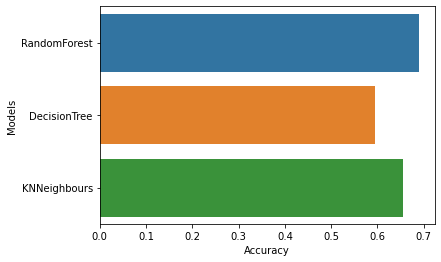

In [31]:
sns.barplot(x= 'Accuracy', y= 'Models', data= outputs)

## 3_menggunakan Shuffle

In [32]:
df=pd.read_csv("water_potability.csv")

In [33]:
df = shuffle(df)

In [34]:
X=df.drop(['Potability'],axis=1)
y=df.filter(['Potability'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

In [35]:
numeric_pipa=Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ])

preposecor=ColumnTransformer([
        ("numeric",numeric_pipa,['ph','Hardness','Sulfate','Conductivity','Chloramines','Solids','Organic_carbon','Trihalomethanes','Turbidity']),
    ])



In [36]:
# random forest
pipaRF=Pipeline([
        ("prep",preposecor),
        ("rf",RandomForestClassifier())
    ])

parameterRF={
        "rf__n_estimators" : [500],
        "rf__min_samples_leaf":[2],
        "rf__max_depth":range(1,50),
        "rf__criterion":["gini","entropy"],
        "rf__max_features":["auto","sqrt","log2"],
    }

# Decision tree
pipaDT=Pipeline([
        ("prep",preposecor),
        ("dt",DecisionTreeClassifier())
    ])

parameterDT={
        "dt__min_samples_leaf":[2],
        "dt__max_depth":range(1,50),
        "dt__criterion":["gini","entropy"],
    }

# KNN
pipaKNN=Pipeline([
        ("prep",preposecor),
        ("knn",KNeighborsClassifier())
    ])

parameterKNN={
        "knn__n_neighbors" : range(1,50),
        "knn__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "knn__p" : range(1,50),
    }



In [37]:
# simple model Random Forest
modelRF = GridSearchCV(pipaRF,parameterRF,cv=5,n_jobs=-1,verbose=1)
modelRF.fit(X_train,y_train.values.ravel())

tuning_terbaikRF=modelRF.best_params_

latihan_akurasiRF=modelRF.score(X_train,y_train)
ujian_akurasiRF=modelRF.score(X_test,y_test)
predRF=modelRF.predict(X_test)
reportRF = classification_report(y_test,predRF)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed: 30.4min finished


In [39]:
filename = 'model/model_RF3.sav'
pickle.dump(modelRF, open(filename, 'wb'))

In [40]:
# simple model Decision Tree
modelDT = GridSearchCV(pipaDT,parameterDT,cv=5,n_jobs=-1,verbose=1)
modelDT.fit(X_train,y_train.values.ravel())

tuning_terbaikDT=modelDT.best_params_

latihan_akurasiDT=modelDT.score(X_train,y_train)
ujian_akurasiDT=modelDT.score(X_test,y_test)
predDT=modelDT.predict(X_test)
reportDT = classification_report(y_test,predDT)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    5.4s finished


In [41]:
filename = 'model/model_DT3.sav'
pickle.dump(modelDT, open(filename, 'wb'))

In [42]:
# simple model KNN
modelKNN = GridSearchCV(pipaKNN,parameterKNN,cv=5,n_jobs=-1,verbose=1)
modelKNN.fit(X_train,y_train.values.ravel())

tuning_terbaikKNN=modelKNN.best_params_

latihan_akurasiKNN=modelKNN.score(X_train,y_train)
ujian_akurasiKNN=modelKNN.score(X_test,y_test)
predKNN=modelKNN.predict(X_test)
reportKNN = classification_report(y_test,predKNN)


Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1264 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1714 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2264 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2914 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3664 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4514 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 5464 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 6514 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 7664 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 8914 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 10264 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 11714 tasks     

In [43]:
filename = 'model/model_KNN3.sav'
pickle.dump(modelKNN, open(filename, 'wb'))

In [44]:
print("")
print("Random Forest")
print('ini adalah tuning terbaik :', tuning_terbaikRF)
print('ini adalah hasil testing',ujian_akurasiRF)
print('ini adalah hasil training', latihan_akurasiRF)
print(reportRF)
print('==============================================')

print("")
print("Decision Tree")
print('ini adalah tuning terbaik :', tuning_terbaikDT)
print('ini adalah hasil testing',ujian_akurasiDT)
print('ini adalah hasil training', latihan_akurasiDT)
print(reportDT)
print('==============================================')

print("")
print("KNN")
print('ini adalah tuning terbaik :', tuning_terbaikKNN)
print('ini adalah hasil testing',ujian_akurasiKNN)
print('ini adalah hasil training', latihan_akurasiKNN)
print(reportKNN)
print('==============================================')


Random Forest
ini adalah tuning terbaik : {'rf__criterion': 'gini', 'rf__max_depth': 38, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__n_estimators': 500}
ini adalah hasil testing 0.665648854961832
ini adalah hasil training 1.0
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       397
           1       0.65      0.33      0.43       258

    accuracy                           0.67       655
   macro avg       0.66      0.61      0.60       655
weighted avg       0.66      0.67      0.63       655


Decision Tree
ini adalah tuning terbaik : {'dt__criterion': 'gini', 'dt__max_depth': 6, 'dt__min_samples_leaf': 2}
ini adalah hasil testing 0.6320610687022901
ini adalah hasil training 0.7086092715231788
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       397
           1       0.59      0.21      0.31       258

    accuracy                           0.63       655
   macr

In [45]:
outputs = pd.DataFrame ({ "Models": ['RandomForest', 'DecisionTree', 'KNNeighbours'], 'Accuracy' : [ujian_akurasiRF, ujian_akurasiDT, ujian_akurasiKNN] })



In [46]:
outputs.sort_values(by='Accuracy', ascending=False)
outputs.head()

,Models,Accuracy
0,RandomForest,0.665649
1,DecisionTree,0.632061
2,KNNeighbours,0.635115


<AxesSubplot:xlabel='Accuracy', ylabel='Models'>

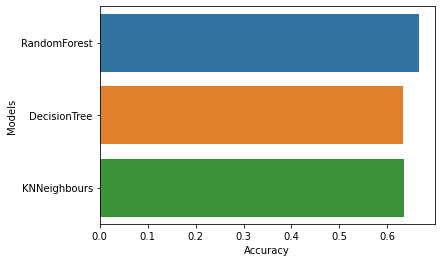

In [47]:
sns.barplot(x= 'Accuracy', y= 'Models', data= outputs)

## 4_menggunakan Catagorical

In [3]:
df=pd.read_csv("water_potability.csv")

In [4]:
df.Turbidity = pd.cut(df.Turbidity,[1,5,7], labels = ['layak','tinggi'])
df.Trihalomethanes = pd.cut(df.Trihalomethanes,[0,80,125], labels = ['layak','tinggi'])
df.Organic_carbon = pd.cut(df.Organic_carbon,[2,24,29], labels = ['layak','tinggi'])
df.Conductivity = pd.cut(df.Conductivity,[181,400,754], labels = ['layak','tinggi'])
df.Sulfate = pd.cut(df.Sulfate,[128,250,482], labels = ['layak','tinggi'])
df.Chloramines = pd.cut(df.Chloramines,[0,5,14], labels = ['layak','tinggi'])
df.Hardness = pd.cut(df.Hardness,[47,500], labels = ['layak'])
df.ph = pd.cut(df.ph,[0,6.5,8.5,15], labels = ['basa','netral','asam'])

In [5]:
X=df.drop(['Solids','Potability'],axis=1)
# xx=df.filter(['Organic_carbon'])
y=df.filter(['Potability'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

In [6]:
print(df.Organic_carbon)

0       layak
1       layak
2       layak
3       layak
4       layak
        ...  
3268    layak
3269    layak
3270    layak
3271    layak
3272    layak
Name: Organic_carbon, Length: 3273, dtype: category
Categories (2, object): [layak < tinggi]


In [7]:
numeric_pipa=Pipeline([
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ])

catagori_pipa=Pipeline([
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder())
    ])

preposecor=ColumnTransformer([
        ("catagoric",catagori_pipa,['ph','Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
])



In [8]:
# random forest
pipaRF=Pipeline([
        ("prep",preposecor),
        ("rf",RandomForestClassifier())
    ])

parameterRF={
        "rf__n_estimators" : [500],
        "rf__min_samples_leaf":[2],
        "rf__max_depth":range(1,50),
        "rf__criterion":["gini","entropy"],
        "rf__max_features":["auto","sqrt","log2"],
    }

# Decision tree
pipaDT=Pipeline([
        ("prep",preposecor),
        ("dt",DecisionTreeClassifier())
    ])

parameterDT={
        "dt__min_samples_leaf":[2],
        "dt__max_depth":range(1,50),
        "dt__criterion":["gini","entropy"],
    }

# KNN
pipaKNN=Pipeline([
        ("prep",preposecor),
        ("knn",KNeighborsClassifier())
    ])

parameterKNN={
        "knn__n_neighbors" : range(1,50),
        "knn__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "knn__p" : range(1,50),
    }



In [10]:
# simple model Random Forest
modelRF = GridSearchCV(pipaRF,parameterRF,cv=5,n_jobs=-1,verbose=1)
modelRF.fit(X_train,y_train.values.ravel())

tuning_terbaikRF=modelRF.best_params_

latihan_akurasiRF=modelRF.score(X_train,y_train)
ujian_akurasiRF=modelRF.score(X_test,y_test)
predRF=modelRF.predict(X_test)
reportRF = classification_report(y_test,predRF)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed: 11.3min finished


In [12]:
filename = 'model/model_RF4.sav'
pickle.dump(modelRF, open(filename, 'wb'))

In [13]:
# simple model Decision Tree
modelDT = GridSearchCV(pipaDT,parameterDT,cv=5,n_jobs=-1,verbose=1)
modelDT.fit(X_train,y_train.values.ravel())

tuning_terbaikDT=modelDT.best_params_

latihan_akurasiDT=modelDT.score(X_train,y_train)
ujian_akurasiDT=modelDT.score(X_test,y_test)
predDT=modelDT.predict(X_test)
reportDT = classification_report(y_test,predDT)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 475 out of 490 | elapsed:    8.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    8.8s finished


In [14]:
filename = 'model/model_DT4.sav'
pickle.dump(modelDT, open(filename, 'wb'))

In [15]:
# simple model KNN
modelKNN = GridSearchCV(pipaKNN,parameterKNN,cv=5,n_jobs=-1,verbose=1)
modelKNN.fit(X_train,y_train.values.ravel())

tuning_terbaikKNN=modelKNN.best_params_

latihan_akurasiKNN=modelKNN.score(X_train,y_train)
ujian_akurasiKNN=modelKNN.score(X_test,y_test)
predKNN=modelKNN.predict(X_test)
reportKNN = classification_report(y_test,predKNN)


Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 762 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 1562 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2762 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4362 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5312 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6362 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7512 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8762 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 10112 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11562 tasks     

In [16]:
filename = 'model/model_KNN4.sav'
pickle.dump(modelKNN, open(filename, 'wb'))

In [17]:
print("")
print("Random Forest")
print('ini adalah tuning terbaik :', tuning_terbaikRF)
print('ini adalah hasil testing',ujian_akurasiRF)
print('ini adalah hasil training', latihan_akurasiRF)
print(reportRF)
print('==============================================')

print("")
print("Decision Tree")
print('ini adalah tuning terbaik :', tuning_terbaikDT)
print('ini adalah hasil testing',ujian_akurasiDT)
print('ini adalah hasil training', latihan_akurasiDT)
print(reportDT)
print('==============================================')

print("")
print("KNN")
print('ini adalah tuning terbaik :', tuning_terbaikKNN)
print('ini adalah hasil testing',ujian_akurasiKNN)
print('ini adalah hasil training', latihan_akurasiKNN)
print(reportKNN)
print('==============================================')


Random Forest
ini adalah tuning terbaik : {'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__n_estimators': 500}
ini adalah hasil testing 0.6610687022900763
ini adalah hasil training 0.6230259806418746
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       429
           1       0.58      0.07      0.12       226

    accuracy                           0.66       655
   macro avg       0.62      0.52      0.45       655
weighted avg       0.63      0.66      0.56       655


Decision Tree
ini adalah tuning terbaik : {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 2}
ini adalah hasil testing 0.6610687022900763
ini adalah hasil training 0.6225165562913907
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       429
           1       0.58      0.06      0.11       226

    accuracy                           0.66   

In [18]:
outputs = pd.DataFrame ({ "Models": ['RandomForest', 'DecisionTree', 'KNNeighbours'], 'Accuracy' : [ujian_akurasiRF, ujian_akurasiDT, ujian_akurasiKNN] })



In [19]:
outputs.sort_values(by='Accuracy', ascending=False)
outputs.head()

,Models,Accuracy
0,RandomForest,0.661069
1,DecisionTree,0.661069
2,KNNeighbours,0.644275


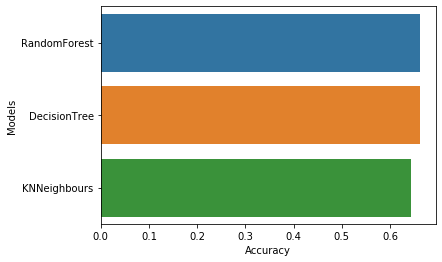

In [20]:
sns.barplot(x= 'Accuracy', y= 'Models', data= outputs)